In [1]:
import librosa
import torch
import random
from torchaudio.datasets import LIBRISPEECH, SPEECHCOMMANDS, YESNO
from IPython.display import Audio

%load_ext autoreload
%autoreload 2
%matplotlib inline

from dstft import DSTFT
from dstft.loss import kurtosis_loss, entropy_loss, kurtosis2_loss
from dstft.optim import scale_loss

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
dataset = SPEECHCOMMANDS(root='../../../data/raw', download=False)
i = random.randint(0, len(dataset))
x, sr, y, speaker_id, utterance_id = dataset[i]
print(f'{y} {x.device} | {i} | x.shape: {x.shape} | sample rate : {sr} | speaker ID: {speaker_id} | utterance ID: {utterance_id}')
Audio(x, rate=sr)

wow cpu | 96705 | x.shape: torch.Size([1, 16000]) | sample rate : 16000 | speaker ID: 833d9f56 | utterance ID: 0


In [3]:
x =x.to(device)

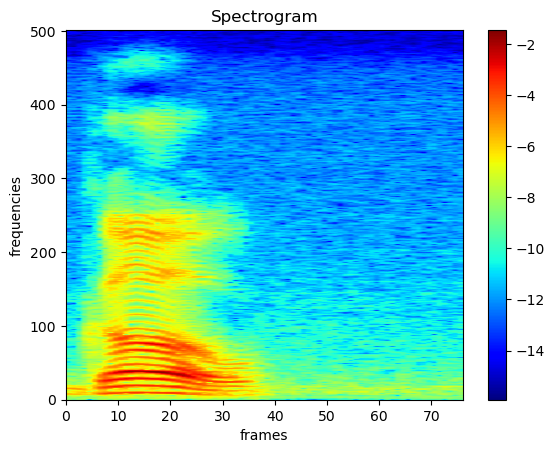

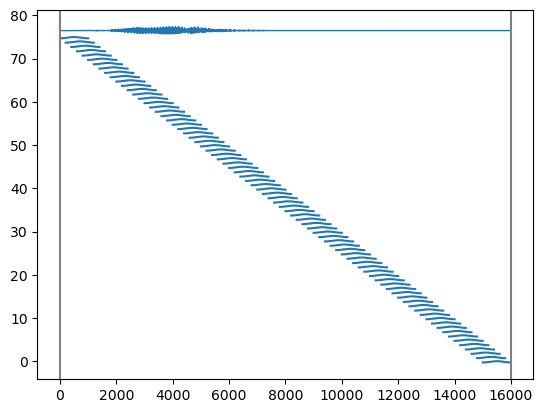

In [23]:
dstft = DSTFT(x, win_length=1000, support=1_000, stride=200, win_requires_grad=False, stride_requires_grad=False, win_p='tf', stride_p=None, first_frame=True)
spec, *_ = dstft(x)
dstft.print(spec, x, weights=False, bar=True)

Epoch 00175: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00275: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00375: reducing learning rate of group 0 to 1.0000e-01.
374


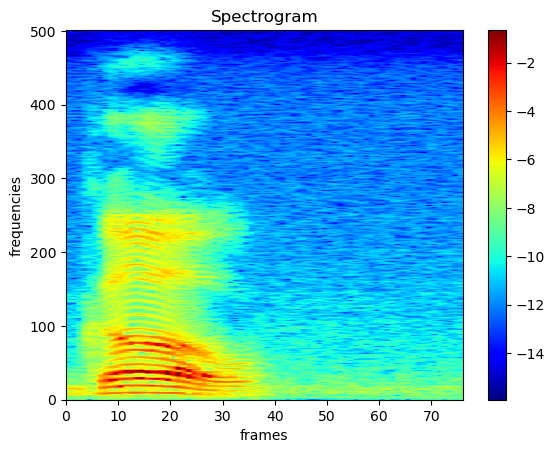

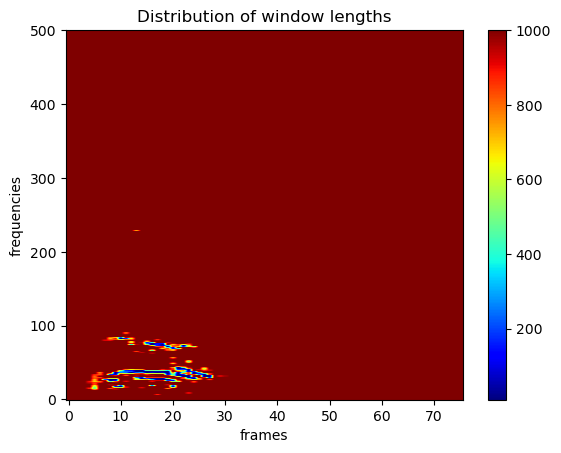

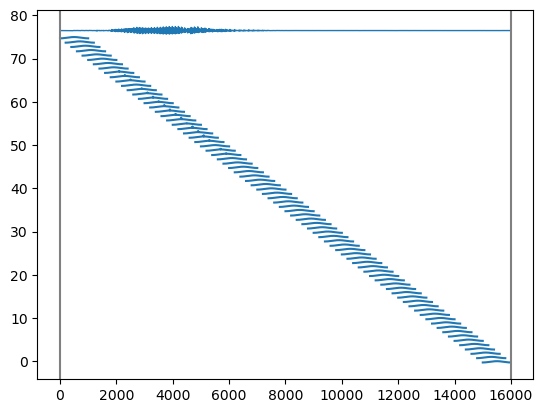

In [20]:
dstft = DSTFT(x, win_length=1_000, support=1_000, stride=200, win_requires_grad=True, stride_requires_grad=False, win_p='tf', win_min=10)
params = [{'params': dstft.win_length, 'lr': 100.0},  ] 
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', factor=.1, patience=99, verbose=True)

for epoch in range(1_000):
    opt.zero_grad()
    spec, *_ = dstft(x)
    err = entropy_loss(spec) + 0.01 * (dstft.actual_win_length.diff(dim=0)[:, :-1].pow(2) + dstft.actual_win_length.diff(dim=1)[:-1].pow(2) + torch.finfo(x.dtype).eps).sqrt().mean()
    err.backward()
    opt.step()
    sch.step(err)
    
    if opt.param_groups[0]['lr'] < 1:
        break
    
print(epoch)
dstft.print(spec, x, bar=True)

Epoch 00141: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00272: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00376: reducing learning rate of group 0 to 1.0000e-01.
375


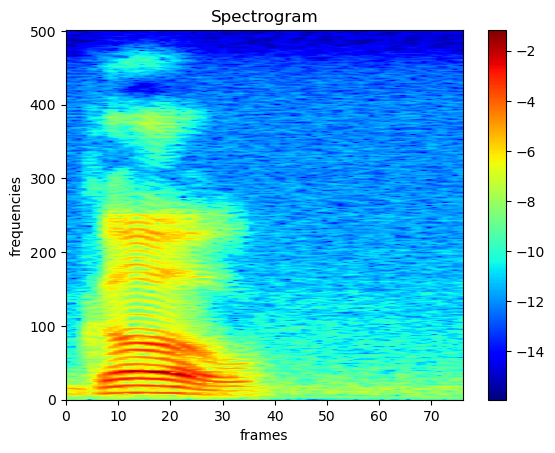

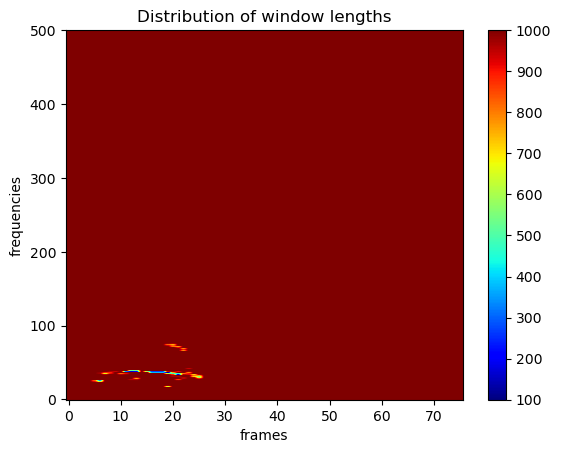

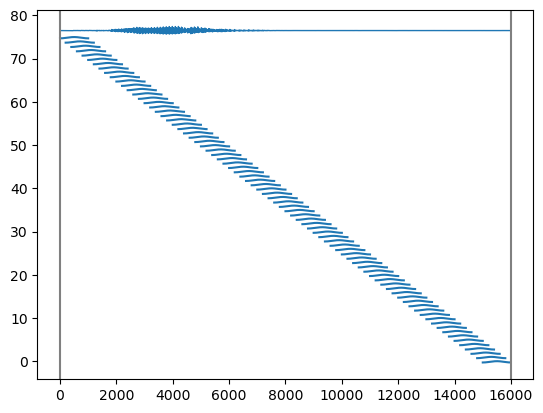

In [21]:
dstft = DSTFT(x, win_length=1_000, support=1_000, stride=200, win_requires_grad=True, stride_requires_grad=False, win_p='tf', win_min=100)
params = [{'params': dstft.win_length, 'lr': 100.0},  ] 
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', factor=.1, patience=99, verbose=True)

for epoch in range(1_000):
    opt.zero_grad()
    spec, *_ = dstft(x)
    err = 1_000 / kurtosis2_loss(spec) + 0.01 * (dstft.actual_win_length.diff(dim=0)[:, :-1].pow(2) + dstft.actual_win_length.diff(dim=1)[:-1].pow(2) + torch.finfo(x.dtype).eps).sqrt().mean()
    err.backward()
    opt.step()
    sch.step(err)
    
    if opt.param_groups[0]['lr'] < 1:
        break
    
print(epoch)
dstft.print(spec, x, bar=True)

Epoch 00175: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00279: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00379: reducing learning rate of group 0 to 1.0000e-01.
378


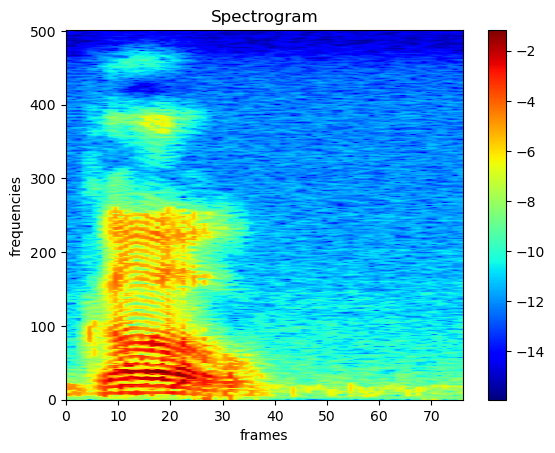

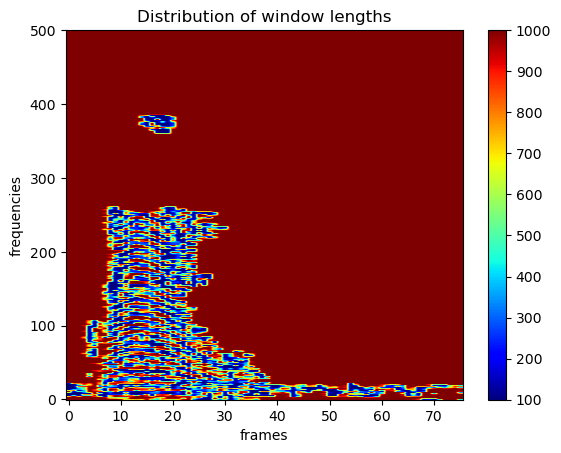

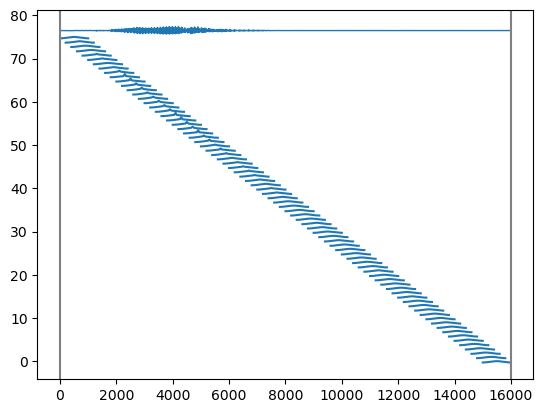

In [22]:
dstft = DSTFT(x, win_length=1_000, support=1_000, stride=200, win_requires_grad=True, stride_requires_grad=False, win_p='tf', win_min=100)
params = [{'params': dstft.win_length, 'lr': 100.0},  ] 
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', factor=.1, patience=99, verbose=True)

for epoch in range(1_000):
    opt.zero_grad()
    spec, *_ = dstft(x)
    err = 1_000 / spec.sum() + 0.01 * (dstft.actual_win_length.diff(dim=0)[:, :-1].pow(2) + dstft.actual_win_length.diff(dim=1)[:-1].pow(2) + torch.finfo(x.dtype).eps).sqrt().mean()
    err.backward()
    opt.step()
    sch.step(err)
    
    if opt.param_groups[0]['lr'] < 1:
        break
    
print(epoch)
dstft.print(spec, x, bar=True)

Epoch 00300: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00447: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00639: reducing learning rate of group 0 to 1.0000e-01.
638


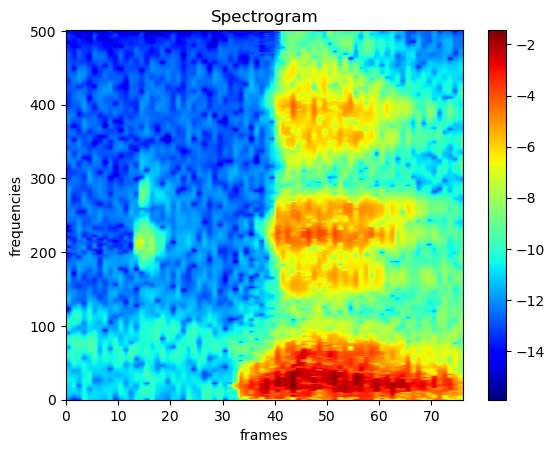

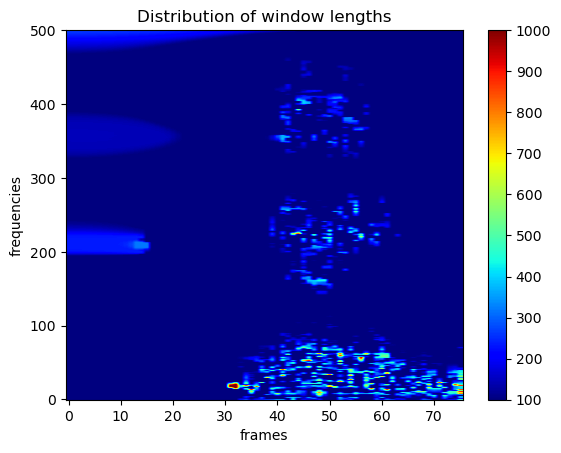

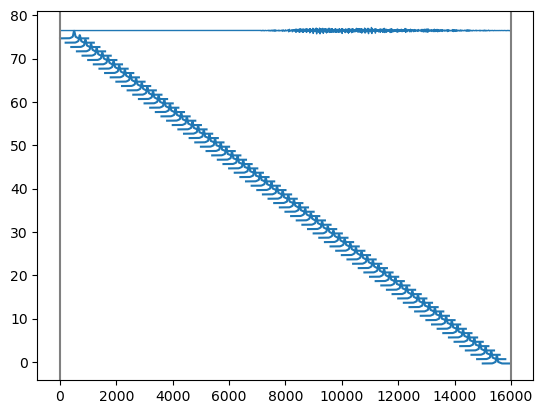

In [4]:
dstft = DSTFT(x, win_length=400, support=1_000, stride=200, win_requires_grad=True, stride_requires_grad=False, win_p='tf', win_min=100)
params = [{'params': dstft.win_length, 'lr': 100.0},  ] 
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', factor=.1, patience=99, verbose=True)

for epoch in range(1_000):
    opt.zero_grad()
    spec, *_ = dstft(x)
    err = 1_000 / spec.sum() + 0.01 * (dstft.actual_win_length.diff(dim=0)[:, :-1].pow(2) + dstft.actual_win_length.diff(dim=1)[:-1].pow(2) + torch.finfo(x.dtype).eps).sqrt().mean()
    err.backward()
    opt.step()
    sch.step(err)
    
    if opt.param_groups[0]['lr'] < 1:
        break
    
print(epoch)
dstft.print(spec, x, bar=True)

Epoch 00159: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00159: reducing learning rate of group 1 to 1.0000e-01.
Epoch 00240: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00240: reducing learning rate of group 1 to 1.0000e-02.
Epoch 00287: reducing learning rate of group 0 to 1.0000e-01.
Epoch 00287: reducing learning rate of group 1 to 1.0000e-03.
286


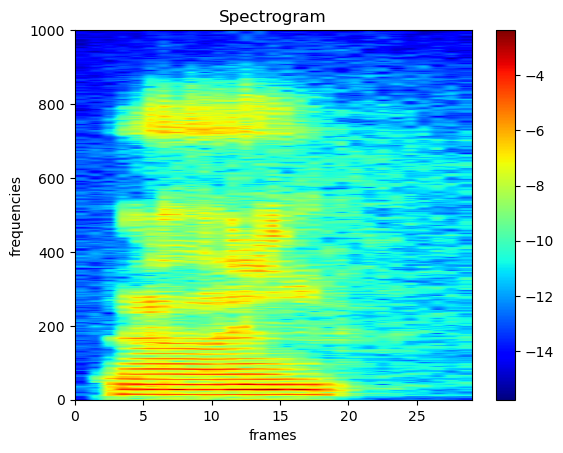

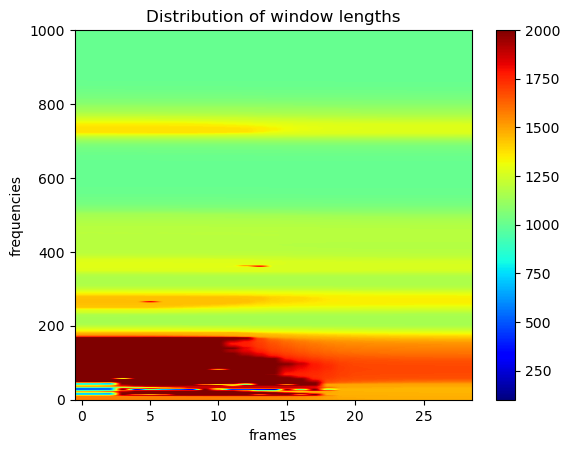

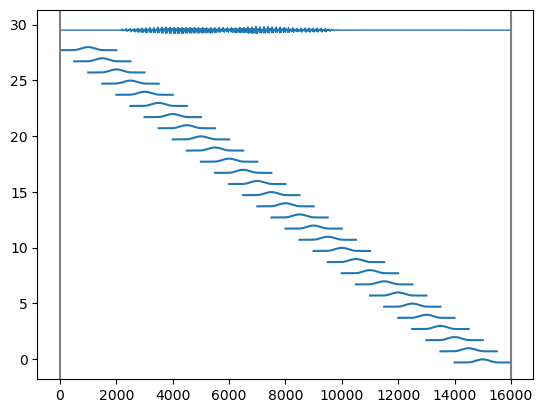

In [ ]:
dstft = DSTFT(x, win_length=400, support=1_000, stride=200, win_requires_grad=True, stride_requires_grad=False, win_p='t', win_min=100)
params = [{'params': dstft.win_length,'lr': 100.0}, {'params': dstft.strides,    'lr': 1.0}] 
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', factor=.1, patience=9, verbose=True)

for epoch in range(1_000):
    opt.zero_grad()
    spec, *_ = dstft(x)
    err = 1_000 / kurtosis2_loss(spec) + 0.01 * (dstft.actual_win_length.diff(dim=0)[:, :-1].pow(2) + dstft.actual_win_length.diff(dim=1)[:-1].pow(2) + torch.finfo(x.dtype).eps).sqrt().mean()
    err.backward()
    opt.step()
    sch.step(err)
    
    if opt.param_groups[0]['lr'] < 1:
        break
    
print(epoch)
dstft.print(spec, x, bar=True)

0 5.780 5.780 0.000
10 5.505 5.505 0.000
20 5.259 5.259 0.000
30 5.036 5.036 0.000
40 4.836 4.836 0.000
50 4.656 4.656 0.000
60 4.492 4.492 0.000
70 4.343 4.343 0.000
80 4.210 4.210 0.000
90 4.086 4.086 0.000
100 3.971 3.971 0.000
110 3.871 3.871 0.000
120 3.771 3.771 0.000
130 3.680 3.680 0.000
140 3.595 3.595 0.000
150 3.514 3.514 0.000
160 3.438 3.438 0.000
170 3.370 3.370 0.000
180 3.302 3.302 0.000
190 3.234 3.234 0.000
200 3.172 3.172 0.000
210 3.114 3.114 0.000
220 3.060 3.060 0.000
230 3.008 3.008 0.000
240 2.957 2.957 0.000
250 2.909 2.909 0.000
260 2.863 2.863 0.000
270 2.819 2.819 0.000
280 2.765 2.765 0.000
290 2.721 2.721 0.000
300 2.684 2.684 0.000
310 2.649 2.649 0.000
320 2.614 2.614 0.000
330 2.568 2.568 0.000
340 2.529 2.529 0.000
350 2.494 2.494 0.000
360 2.462 2.462 0.000
370 2.433 2.433 0.000
380 2.404 2.404 0.000
390 2.377 2.377 0.000
400 2.352 2.352 0.000
410 2.326 2.326 0.000
420 2.288 2.288 0.000
430 2.248 2.248 0.000
440 2.224 2.224 0.000
450 2.202 2.202 0.000

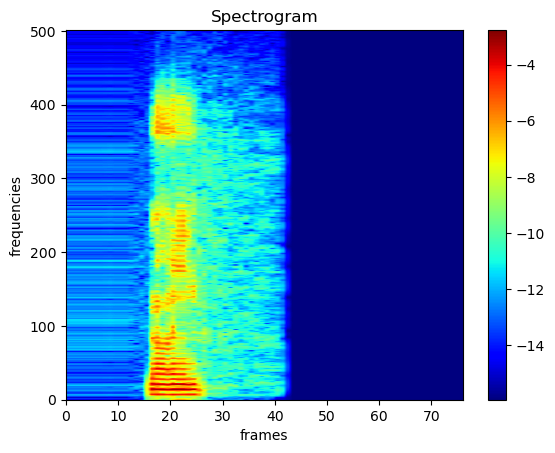

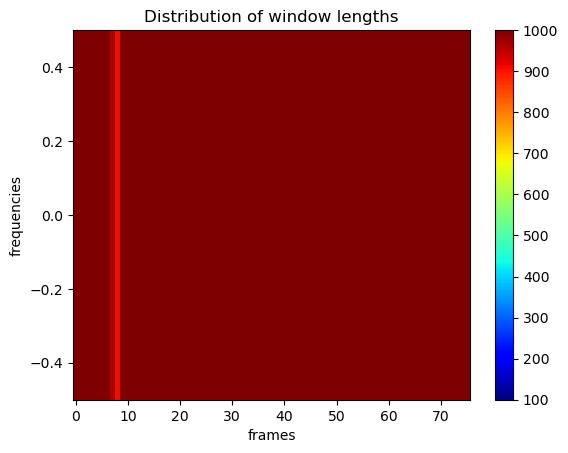

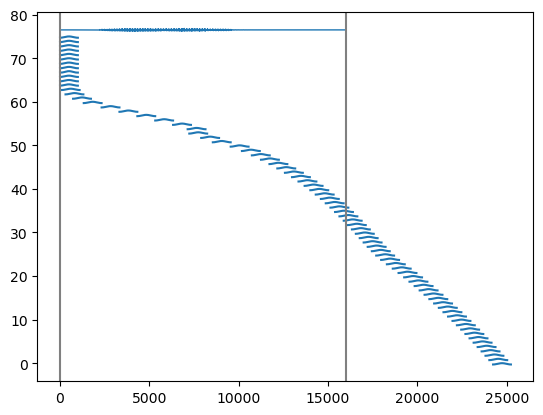

In [ ]:
dstft = DSTFT(x, win_length=400, support=1_000, stride=200, win_requires_grad=True, stride_requires_grad=True, win_p='t', stride_p='t', win_min=100, first_frame=True)
params = [ {'params': dstft.parameters(),   'lr': 1.0}]
opt = torch.optim.Adam(params)
sch =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', factor=.5, patience=99, verbose=True)

def loss_kur(spec, dstft):
    return 1_000 * (1 / spec.sum())

def loss_cov(dstft):
    return 1_000 * (1 - dstft.coverage())

for epoch in range(10_000):
    scale = scale_loss(dstft, x, loss_kur, loss_cov)
    
    opt.zero_grad()    
    spec, *_ = dstft(x)
    loss1 = 1_000 / kurtosis2_loss(spec)
    loss2 = loss_cov(dstft)
    
    err = scale['loss1'] * loss1 + scale['loss2'] * loss2
    err.backward()
    opt.step()
    sch.step(err)
    
    if epoch % 10 ==0:
        print(f'{epoch} {err:.3f} {loss1:.3f} {loss2:.3f}')
    
    if opt.param_groups[0]['lr'] < 1:
        break

print(epoch)
dstft.print(spec, x, bar=True)

In [3]:
dataset = YESNO(root='../../../data/raw', url='dev-clean', download=False)
i = random.randint(0, len(dataset))
x, sr, y = dataset[i]
print(f'{y} | {i} | x.shape: {x.shape} | sample rate : {sr}')
Audio(x, rate=sr)

[0, 1, 0, 0, 0, 1, 1, 0] | 18 | x.shape: torch.Size([1, 44640]) | sample rate : 8000


In [16]:
dataset = LIBRISPEECH(root='../../../data/raw', url='dev-clean', folder_in_archive='LibriSpeech', download=False)
i = random.randint(0, len(dataset))
x, sr, y, speaker_id, chapter_id, utterance_id = dataset[i]
print(f'{y} \n{i} | x.shape: {x.shape} | sample rate : {sr} | speaker ID: {speaker_id} | utterance ID: {utterance_id}')
Audio(x, rate=sr)


SO SLOW AND PATIENT IS THE PROCESS BY WHICH CHRISTIANITY INFUSES ITSELF INTO THE SOCIAL LIFE OF A CONVERTED PEOPLE 
537 | x.shape: torch.Size([1, 117600]) | sample rate : 16000 | speaker ID: 2035 | utterance ID: 14


In [17]:
x =x.to(device)

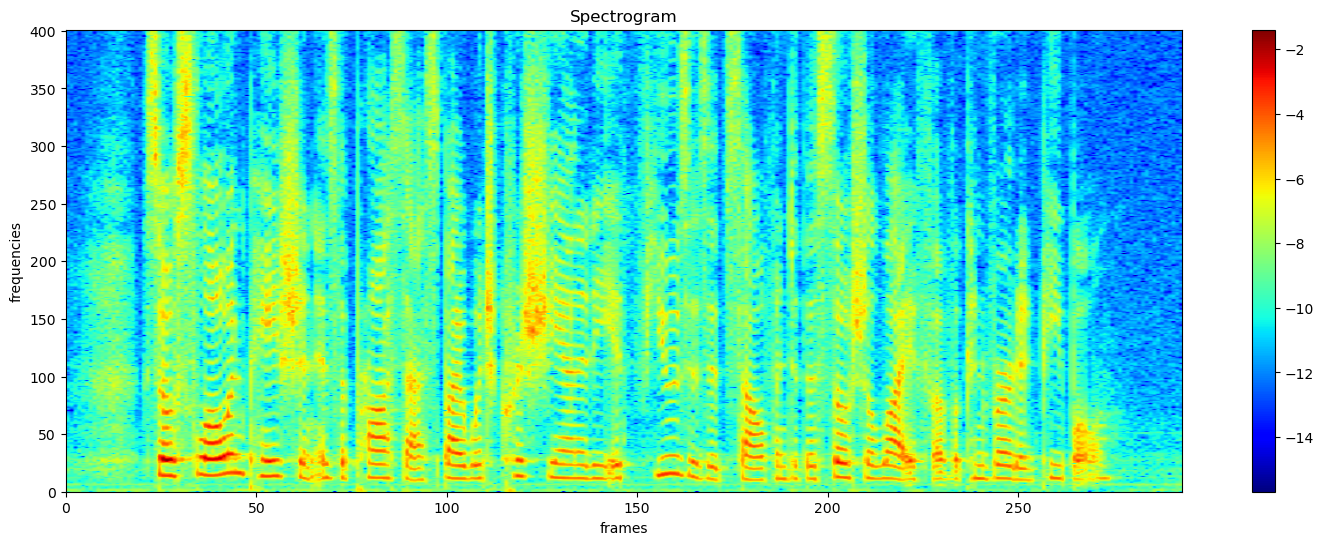

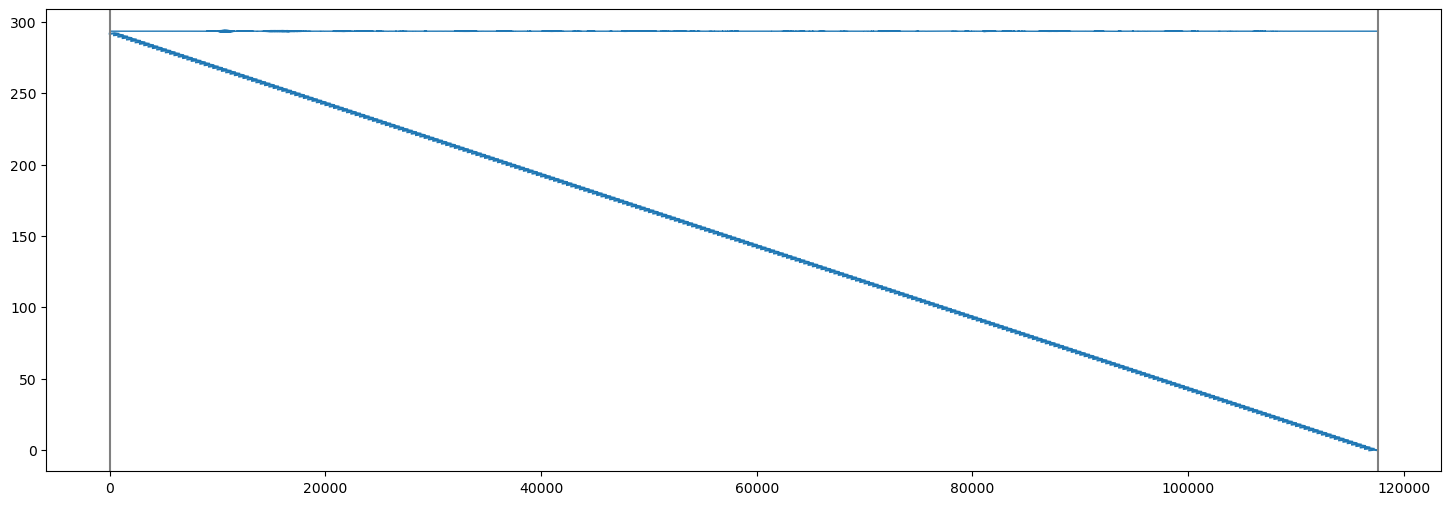

In [18]:
dstfta = DSTFT(x, win_length=800, support=800, stride=400, win_requires_grad=False, stride_requires_grad=False, win_p='tf', stride_p=None, first_frame=True)
speca, *_ = dstfta(x)
dstfta.print(speca, x, weights=False, bar=True)

Epoch 00155: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00259: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00359: reducing learning rate of group 0 to 1.0000e-01.
358


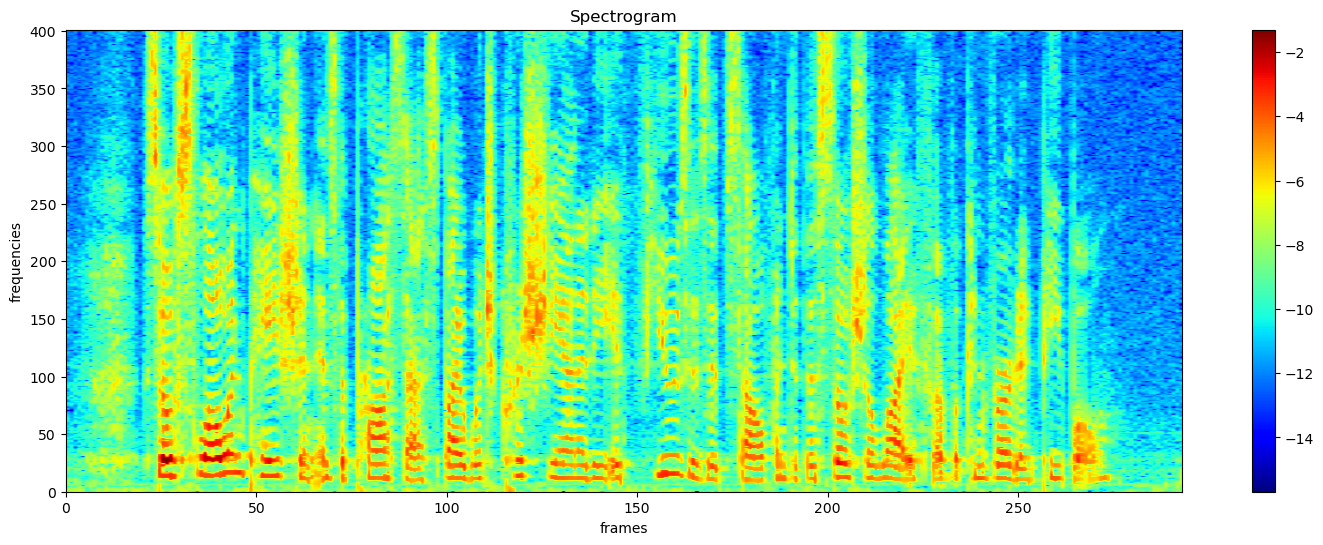

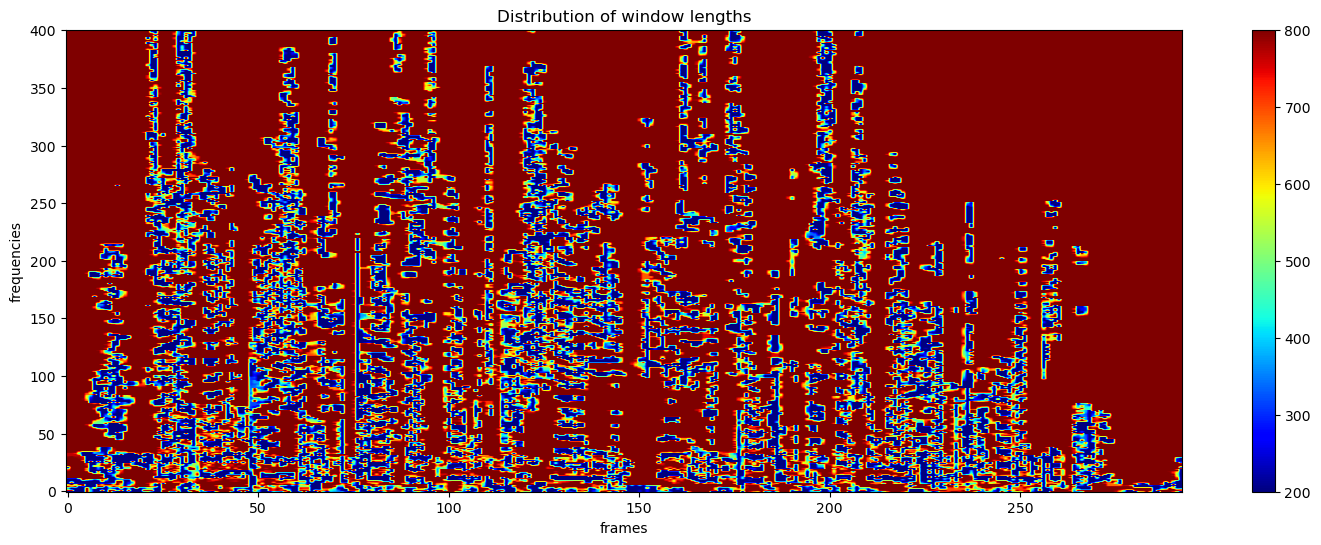

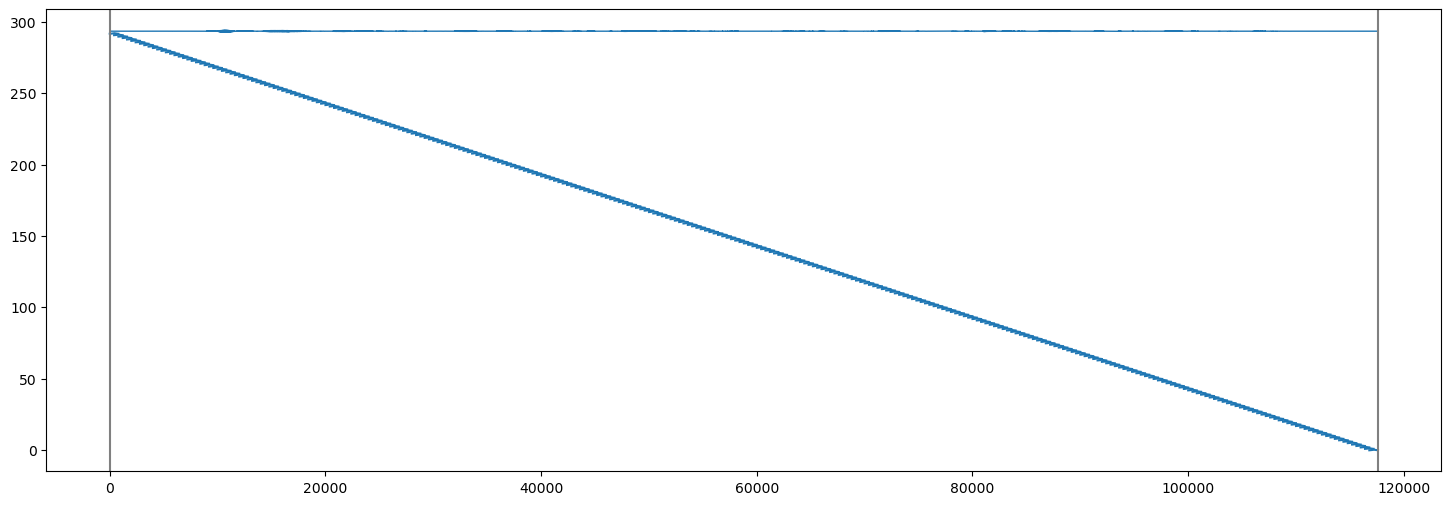

In [19]:
dstft = DSTFT(x, win_length=800, support=800, stride=400, win_requires_grad=True, stride_requires_grad=False, win_p='tf', win_min=200)
params = [{'params': dstft.win_length, 'lr': 100.0},  ] 
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', factor=.1, patience=99, verbose=True)

for epoch in range(1_000):
    opt.zero_grad()
    spec, *_ = dstft(x)
    err = 1_000 / spec.sum() + 0.01 * (dstft.actual_win_length.diff(dim=0)[:, :-1].pow(2) + dstft.actual_win_length.diff(dim=1)[:-1].pow(2) + torch.finfo(x.dtype).eps).sqrt().mean()
    err.backward()
    opt.step()
    sch.step(err)
    
    if opt.param_groups[0]['lr'] < 1:
        break
    
print(epoch)
dstft.print(spec, x, bar=True)

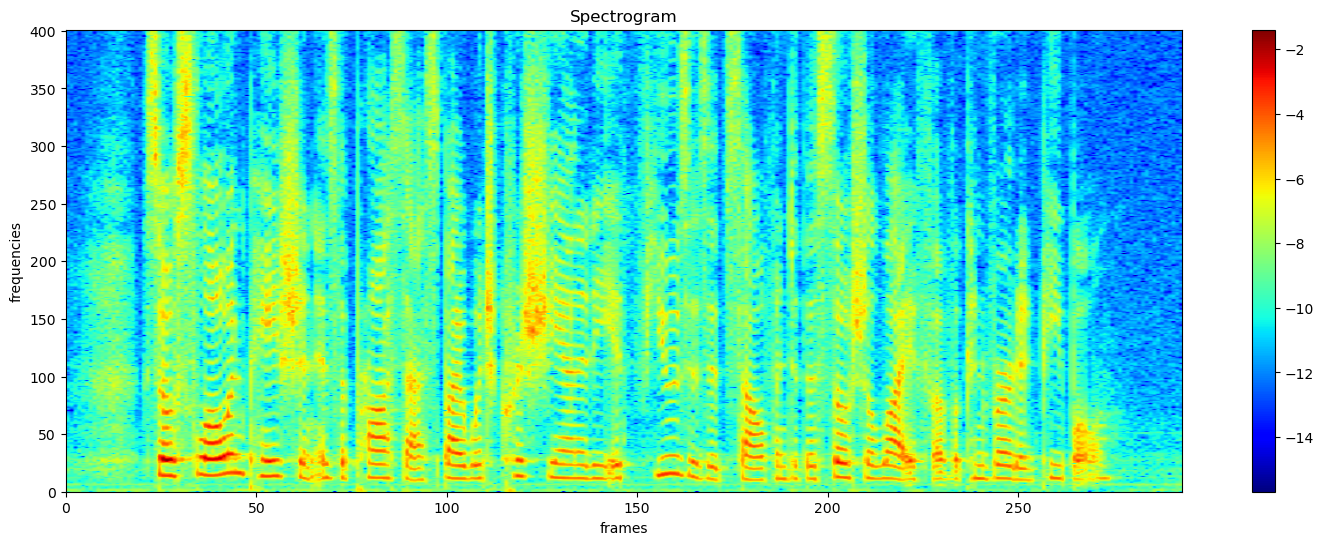

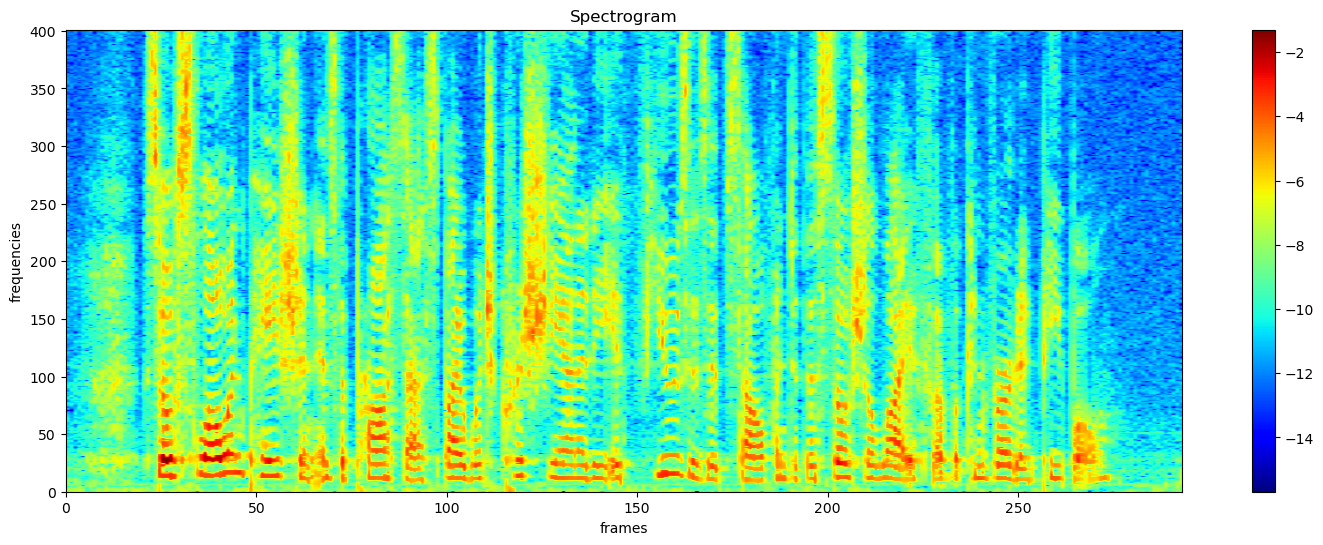

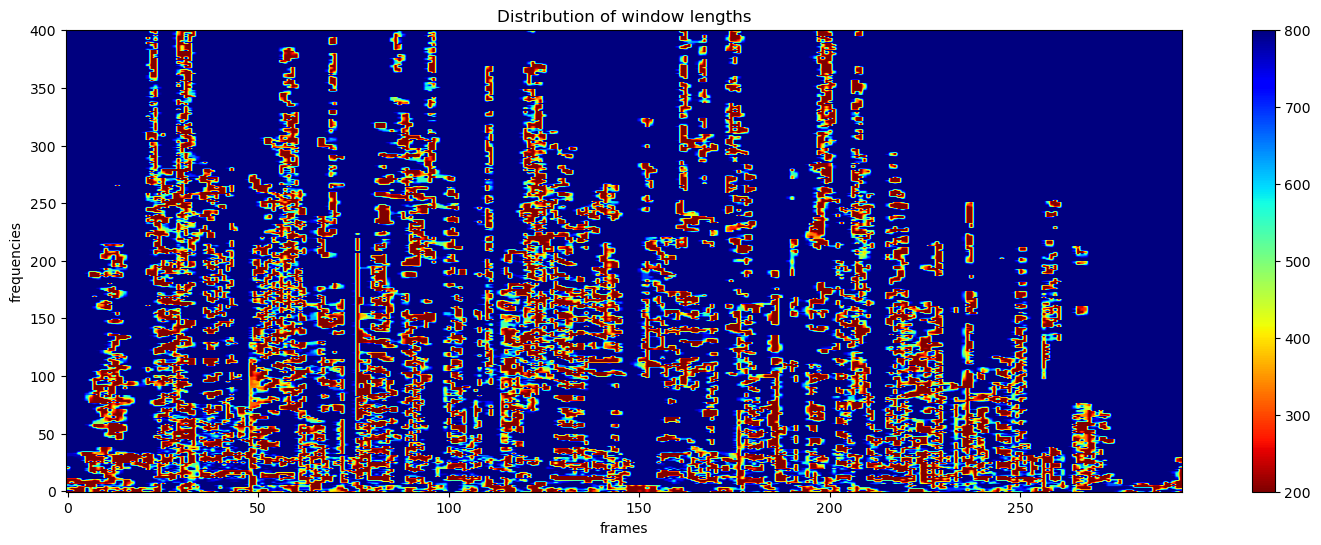

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)
dstfta.print(speca, x, wins=False, weights=False, bar=True)
dstft.print(spec, x, wins= False, bar=True)